In [1]:
import sys
sys.path.insert(0, '../caratheodory')

In [2]:
from caratheodory import Caratheodory
import numpy as np
import matplotlib.pyplot as plt


def interpolate(G, omega, beta, beta_new, kernel, bound=50):
    # Due to the accumulated numerical errors in calculating S, interpolating with reversed omega and G could be more accurate for large frequencies.
    # The ``bound" variable is used to determine when to switch from the normal order to the reversed order.
    # In most time, (when the number of frequencies is not large), this does not matter.
    G_new = np.zeros(G.shape, dtype=np.complex128)
    omega_new = omega*beta/beta_new
    kernel.build(omega, G)
    G_new[omega_new.imag < bound, :, :] = kernel.evaluate(omega_new[omega_new.imag < bound])
    kernel.build(omega[::-1], G[::-1].copy())
    G_new[omega_new.imag >= bound, :, :] = kernel.evaluate(omega_new[omega_new.imag >= bound])
    return G_new, omega_new


In [3]:
data=np.loadtxt("example_input.txt", dtype=np.complex_)
omega=data[:,0]
sigma=data[:,1]
beta=18
beta_new=20

In [4]:
kernel = Caratheodory()
sigma.shape+=(1,1)
sigma_new, omega_new = interpolate(sigma,omega,beta,beta_new,kernel)

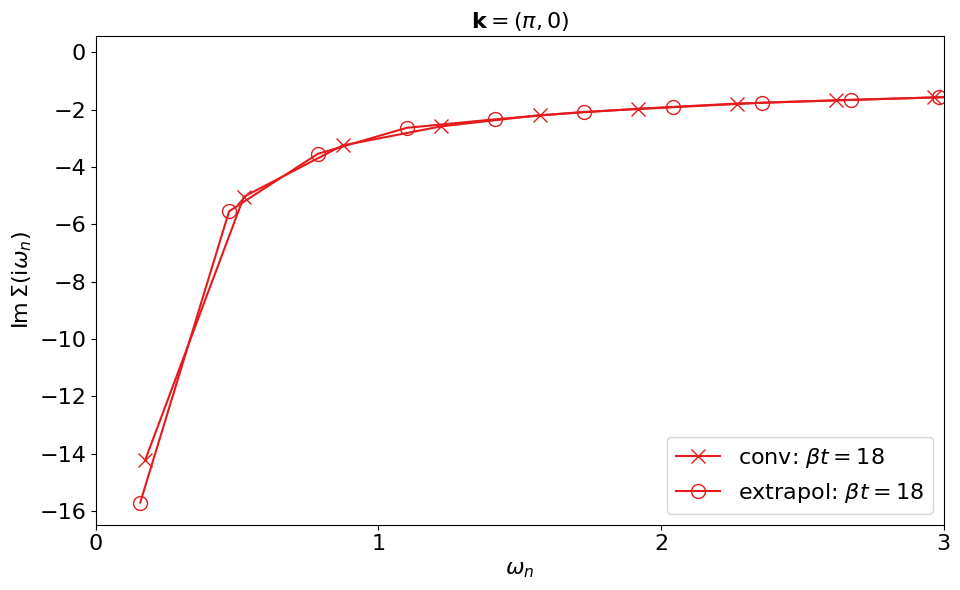

In [5]:
red_color='#e41a1c'
font_size=16
fig,ax= plt.subplots(1,figsize=(6*1.618,6))
ax.plot(omega.imag,sigma[:,0,0].imag,"x-",label=r"conv: $ \beta t={}$".format(beta),markersize=10,color=red_color)
ax.plot(omega_new.imag,sigma_new[:,0,0].imag,"o-",label=r"extrapol: $\beta t={}$".format(beta),markersize=10,color=red_color,mfc="none")

ax.set_ylabel("$\operatorname{Im} \Sigma (\mathrm{i} \omega_{n})$", fontsize=font_size)
ax.set_xlabel(r"$\omega_n$", fontsize=font_size)
ax.set_title(r"$\mathbf{k}=(\pi,0)$", fontsize=font_size)
ax.tick_params(axis='both', labelsize=font_size)
ax.set_xlim(0,3)
ax.set_xticks([0,1,2,3])
ax.legend(loc="lower right", fontsize=font_size)
fig.tight_layout()
